## Predicting Energy consumption in NYC

A Data-Driven Approach to Sustainable Urban Living"

Datasets: https://data.cityofnewyork.us/Environment/NYC-Building-Energy-and-Water-Data-Disclosure-for-/5zyy-y8am/about_data / https://www.nyc.gov/site/planning/data-maps/open-data/dwn-pluto-mappluto.page


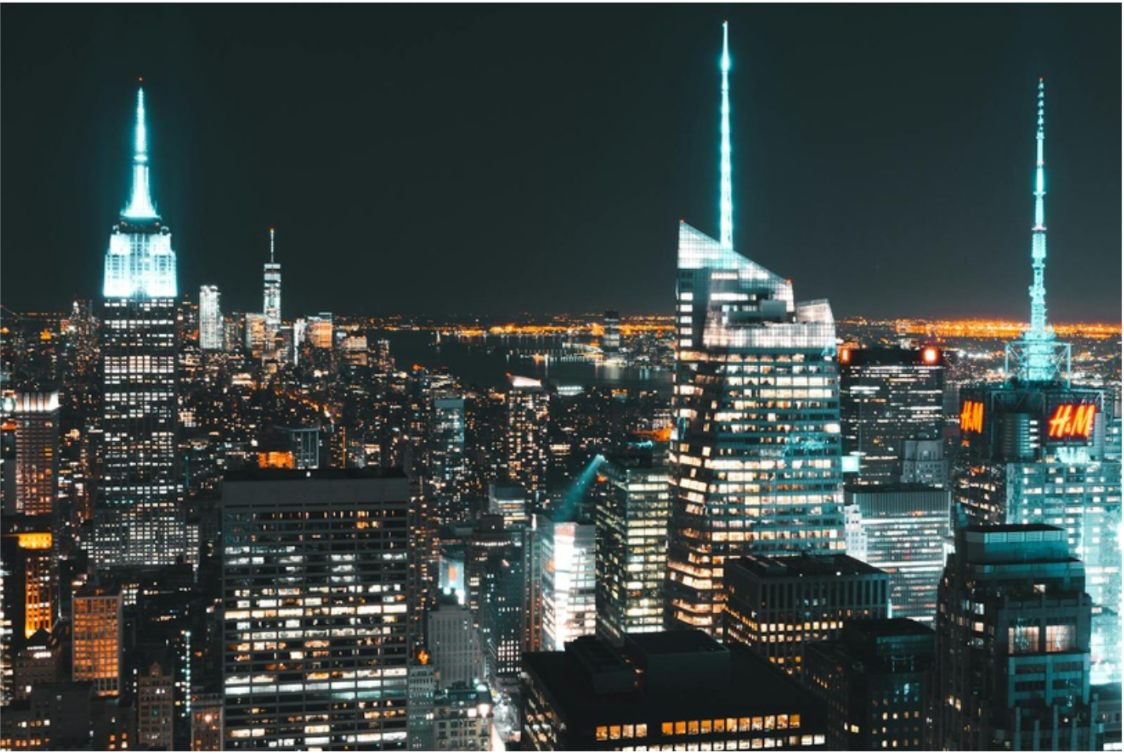

## Business Understanding:
This project centers on the analysis and prediction of energy consumption in buildings across New York City, with a focus on driving positive outcomes for various stakeholders. The intended audience includes urban planners, environmentalists, the New York State Government, real estate investors, and policymakers. The goal is to provide insights that can influence energy-efficient building practices, shape policies supporting sustainable living, and contribute to cost savings for individuals and businesses. By predicting energy efficiency trends, the project aims to guide strategic decisions that not only optimize resource usage and reduce environmental impact but also support economic development and enhance the overall resilience of the community


In [268]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.tree import DecisionTreeRegressor
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV


In [269]:
df1=pd.read_csv('pluto_23v3_1.csv')

/var/folders/py/3n00xtn91530fm9swm7lpdx80000gp/T/ipykernel_27094/2304802100.py:1: DtypeWarning: Columns (21,22,24,25,26,28,65,66,81,88) have mixed types. Specify dtype option on import or set low_memory=False.
  df1=pd.read_csv('pluto_23v3_1.csv')


In [271]:
df1.shape

(858598, 92)

In [272]:
df1.head()

,borough,block,lot,cd,bct2020,bctcb2020,ct2010,cb2010,schooldist,council,...,appbbl,appdate,plutomapid,firm07_flag,pfirm15_flag,version,dcpedited,latitude,longitude,notes
0,BX,5595,94,210.0,2013200.0,2.013201e+10,132.0,5008.0,8.0,13.0,...,NaN,NaN,1,NaN,NaN,23v3.1,NaN,40.814154,-73.820936,NaN
1,BX,5593,98,210.0,2013200.0,2.013201e+10,132.0,5006.0,8.0,13.0,...,NaN,NaN,1,NaN,1.0,23v3.1,NaN,40.814429,-73.819393,NaN
2,BX,5593,106,210.0,2013200.0,2.013201e+10,132.0,5006.0,8.0,13.0,...,NaN,NaN,1,NaN,1.0,23v3.1,NaN,40.814896,-73.819695,NaN
3,BX,5593,103,210.0,2013200.0,2.013201e+10,132.0,5006.0,8.0,13.0,...,NaN,NaN,1,1.0,1.0,23v3.1,NaN,40.814706,-73.819580,NaN
4,BX,5593,101,210.0,2013200.0,2.013201e+10,132.0,5006.0,8.0,13.0,...,NaN,NaN,1,1.0,1.0,23v3.1,NaN,40.814577,-73.819504,NaN


In [273]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858598 entries, 0 to 858597
Data columns (total 92 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   borough               858598 non-null  object 
 1   block                 858598 non-null  int64  
 2   lot                   858598 non-null  int64  
 3   cd                    857655 non-null  float64
 4   bct2020               857601 non-null  float64
 5   bctcb2020             857601 non-null  float64
 6   ct2010                857601 non-null  float64
 7   cb2010                857601 non-null  float64
 8   schooldist            856929 non-null  float64
 9   council               857513 non-null  float64
 10  zipcode               856914 non-null  float64
 11  firecomp              856910 non-null  object 
 12  policeprct            856924 non-null  float64
 13  healthcenterdistrict  856924 non-null  float64
 14  healtharea            856924 non-null  float64
 15  

In [274]:
#Convert the data set into lower case
df1 = df1.applymap(lambda x: x.lower() if isinstance(x, str) else x)
df1

# Convert column names to lowercase
df1.columns = [col.lower() for col in df1.columns]
df1.head()



/var/folders/py/3n00xtn91530fm9swm7lpdx80000gp/T/ipykernel_27094/1290682178.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df1 = df1.applymap(lambda x: x.lower() if isinstance(x, str) else x)


,borough,block,lot,cd,bct2020,bctcb2020,ct2010,cb2010,schooldist,council,...,appbbl,appdate,plutomapid,firm07_flag,pfirm15_flag,version,dcpedited,latitude,longitude,notes
0,bx,5595,94,210.0,2013200.0,2.013201e+10,132.0,5008.0,8.0,13.0,...,NaN,NaN,1,NaN,NaN,23v3.1,NaN,40.814154,-73.820936,NaN
1,bx,5593,98,210.0,2013200.0,2.013201e+10,132.0,5006.0,8.0,13.0,...,NaN,NaN,1,NaN,1.0,23v3.1,NaN,40.814429,-73.819393,NaN
2,bx,5593,106,210.0,2013200.0,2.013201e+10,132.0,5006.0,8.0,13.0,...,NaN,NaN,1,NaN,1.0,23v3.1,NaN,40.814896,-73.819695,NaN
3,bx,5593,103,210.0,2013200.0,2.013201e+10,132.0,5006.0,8.0,13.0,...,NaN,NaN,1,1.0,1.0,23v3.1,NaN,40.814706,-73.819580,NaN
4,bx,5593,101,210.0,2013200.0,2.013201e+10,132.0,5006.0,8.0,13.0,...,NaN,NaN,1,1.0,1.0,23v3.1,NaN,40.814577,-73.819504,NaN


In [275]:
df1['address'][100:150]

100          326 swinton avenue
101          2784a miles avenue
102           2800 miles avenue
103           2802 miles avenue
104           2766 miles avenue
105        197 brinsmade avenue
106          237 swinton avenue
107        224 brinsmade avenue
108        192 brinsmade avenue
109          195 swinton avenue
110          197 swinton avenue
111          191 swinton avenue
112          186 swinton avenue
113          2800 schurz avenue
114          185 swinton avenue
115          184 swinton avenue
116          193 swinton avenue
117           221 quincy avenue
118          210 swinton avenue
119           2801 collis place
120           227 quincy avenue
121           220 quincy avenue
122     42-08 ditmars boulevard
123          2500 halsey street
124          2780 schurz avenue
125    4216 east tremont avenue
126          270 calhoun avenue
127    4218 east tremont avenue
128          258 calhoun avenue
129    4222 east tremont avenue
130          271 calhoun avenue
131     

In [276]:
df1.isna().sum()

borough           0
block             0
lot               0
cd              943
bct2020         997
              ...  
version           0
dcpedited    816447
latitude       1049
longitude      1049
notes        858598
Length: 92, dtype: int64

In [277]:
df1.columns

Index(['borough', 'block', 'lot', 'cd', 'bct2020', 'bctcb2020', 'ct2010',
       'cb2010', 'schooldist', 'council', 'zipcode', 'firecomp', 'policeprct',
       'healthcenterdistrict', 'healtharea', 'sanitboro', 'sanitdistrict',
       'sanitsub', 'address', 'zonedist1', 'zonedist2', 'zonedist3',
       'zonedist4', 'overlay1', 'overlay2', 'spdist1', 'spdist2', 'spdist3',
       'ltdheight', 'splitzone', 'bldgclass', 'landuse', 'easements',
       'ownertype', 'ownername', 'lotarea', 'bldgarea', 'comarea', 'resarea',
       'officearea', 'retailarea', 'garagearea', 'strgearea', 'factryarea',
       'otherarea', 'areasource', 'numbldgs', 'numfloors', 'unitsres',
       'unitstotal', 'lotfront', 'lotdepth', 'bldgfront', 'bldgdepth', 'ext',
       'proxcode', 'irrlotcode', 'lottype', 'bsmtcode', 'assessland',
       'assesstot', 'exempttot', 'yearbuilt', 'yearalter1', 'yearalter2',
       'histdist', 'landmark', 'builtfar', 'residfar', 'commfar', 'facilfar',
       'borocode', 'bbl', 'cond

## Reading df2

In [278]:
df2=pd.read_csv('NYC_Building_Energy_and_Water_Data_Disclosure_for_Local_Law_84__2023-Present__20240129.csv')

/var/folders/py/3n00xtn91530fm9swm7lpdx80000gp/T/ipykernel_27094/3466643168.py:1: DtypeWarning: Columns (10,78) have mixed types. Specify dtype option on import or set low_memory=False.
  df2=pd.read_csv('NYC_Building_Energy_and_Water_Data_Disclosure_for_Local_Law_84__2023-Present__20240129.csv')


In [280]:
df2.shape

(30485, 254)

In [281]:
df2.head()

,Report Year,Property ID,Property Name,Parent Property ID,Parent Property Name,Year Ending,"NYC Borough, Block and Lot (BBL)",NYC Building Identification Number (BIN),Address 1,City,...,Number of Active IT Meters,Report Generation Date,Report Submission Date,Borough,Latitude,Longitude,Community Board,Council District,Census Tract (2020),Neighborhood Tabulation Area (NTA) (2020)
0,2022,6414946,58-01 Grand Avenue,Not Applicable: Standalone Property,Not Applicable: Standalone Property,12/31/2022,4026780001,4059918,58-01 Grand Avenue,Queens,...,0,04/25/2023 11:01:44 AM,04/25/2023 11:02:08 AM,QUEENS,40.719667,-73.911197,405.0,30.0,531.0,QN0501
1,2022,9793770,1870 Pelham Parkway South,Not Applicable: Standalone Property,Not Applicable: Standalone Property,12/31/2022,2042500026,2047795,1870 Pelham Parkway South,Bronx,...,0,03/11/2023 02:00:50 PM,03/11/2023 02:01:08 PM,BRONX,40.855488,-73.830726,210.0,13.0,300.0,BX1003
2,2022,10177418,Central Building,Not Applicable: Standalone Property,Not Applicable: Standalone Property,12/31/2022,4157040040,4300145,2011 Mott Ave,Far Rockaway,...,0,04/14/2023 03:47:19 PM,04/14/2023 03:47:37 PM,QUEENS,40.604320,-73.753009,414.0,31.0,100803.0,QN1401
3,2022,13511507,215 East 99th Street,Not Applicable: Standalone Property,Not Applicable: Standalone Property,12/31/2022,1016490009,1052383,215 East 99th Street,New York,...,0,03/12/2023 03:54:23 PM,03/12/2023 03:54:43 PM,MANHATTAN,40.786963,-73.947537,111.0,8.0,164.0,MN1101
4,2022,14009907,23-25 31 Street,Not Applicable: Standalone Property,Not Applicable: Standalone Property,12/31/2022,4008350027,4017180,23-25 31 Street,Queens,...,0,04/28/2023 02:22:48 PM,04/28/2023 02:23:30 PM,QUEENS,40.773768,-73.913573,401.0,22.0,115.0,QN0101


In [282]:
# Convert column names to lowercase
df2.columns = [col.lower() for col in df2.columns]

#Convert the data set into lower case
df2 = df2.applymap(lambda x: x.lower() if isinstance(x, str) else x)
df2.head()

/var/folders/py/3n00xtn91530fm9swm7lpdx80000gp/T/ipykernel_27094/1536913436.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df2 = df2.applymap(lambda x: x.lower() if isinstance(x, str) else x)


,report year,property id,property name,parent property id,parent property name,year ending,"nyc borough, block and lot (bbl)",nyc building identification number (bin),address 1,city,...,number of active it meters,report generation date,report submission date,borough,latitude,longitude,community board,council district,census tract (2020),neighborhood tabulation area (nta) (2020)
0,2022,6414946,58-01 grand avenue,not applicable: standalone property,not applicable: standalone property,12/31/2022,4026780001,4059918,58-01 grand avenue,queens,...,0,04/25/2023 11:01:44 am,04/25/2023 11:02:08 am,queens,40.719667,-73.911197,405.0,30.0,531.0,qn0501
1,2022,9793770,1870 pelham parkway south,not applicable: standalone property,not applicable: standalone property,12/31/2022,2042500026,2047795,1870 pelham parkway south,bronx,...,0,03/11/2023 02:00:50 pm,03/11/2023 02:01:08 pm,bronx,40.855488,-73.830726,210.0,13.0,300.0,bx1003
2,2022,10177418,central building,not applicable: standalone property,not applicable: standalone property,12/31/2022,4157040040,4300145,2011 mott ave,far rockaway,...,0,04/14/2023 03:47:19 pm,04/14/2023 03:47:37 pm,queens,40.604320,-73.753009,414.0,31.0,100803.0,qn1401
3,2022,13511507,215 east 99th street,not applicable: standalone property,not applicable: standalone property,12/31/2022,1016490009,1052383,215 east 99th street,new york,...,0,03/12/2023 03:54:23 pm,03/12/2023 03:54:43 pm,manhattan,40.786963,-73.947537,111.0,8.0,164.0,mn1101
4,2022,14009907,23-25 31 street,not applicable: standalone property,not applicable: standalone property,12/31/2022,4008350027,4017180,23-25 31 street,queens,...,0,04/28/2023 02:22:48 pm,04/28/2023 02:23:30 pm,queens,40.773768,-73.913573,401.0,22.0,115.0,qn0101


In [283]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30485 entries, 0 to 30484
Columns: 254 entries, report year to neighborhood tabulation area (nta) (2020)
dtypes: bool(2), float64(9), int64(10), object(233)
memory usage: 58.7+ MB


In [284]:
list(df2.columns)

['report year',
 'property id',
 'property name',
 'parent property id',
 'parent property name',
 'year ending',
 'nyc borough, block and lot (bbl)',
 'nyc building identification number (bin)',
 'address 1',
 'city',
 'postal code',
 'primary property type - self selected',
 'primary property type - portfolio manager-calculated',
 'national median reference property type',
 'list of all property use types (gfa) (ft²)',
 'largest property use type',
 'largest property use type - gross floor area (ft²)',
 '2nd largest property use type',
 '2nd largest property use type - gross floor area (ft²)',
 '3rd largest property use type',
 '3rd largest property use type - gross floor area (ft²)',
 'year built',
 'construction status',
 'number of buildings',
 'occupancy',
 'metered areas (energy)',
 'metered areas (water)',
 'energy star score',
 'national median energy star score',
 'target energy star score',
 'reason(s) for no score',
 'energy star certification - year(s) certified (score)',


## Merging using address 

In [285]:
df1['address']

0           2737 schurz avenue
1         182 brinsmade avenue
2         196 brinsmade avenue
3         190 brinsmade avenue
4         186 brinsmade avenue
                  ...         
858593        18 kissam avenue
858594           jewett avenue
858595       40 holcomb avenue
858596        holden boulevard
858597    342 amsterdam avenue
Name: address, Length: 858598, dtype: object

In [286]:
df1['address'] = df1['address'].str.replace('-', '')  # Remove '-'
df1['address'] = df1['address'].str.split('/').str[0].str.strip()  # Select elements before '/' and remove leading/trailing whitespaces

In [287]:
df2['address 1']

0               58-01 grand avenue
1        1870 pelham parkway south
2                    2011 mott ave
3             215 east 99th street
4                  23-25 31 street
                   ...            
30480             163 front street
30481              15 lisbon place
30482                113-25 14 ave
30483               450 zerega ave
30484         347-349 rider avenue
Name: address 1, Length: 30485, dtype: object

In [288]:
df2['address 1'] = df2['address 1'].str.replace('-', '')  # Remove '-'
df2['address 1'] = df2['address 1'].str.split('/').str[0].str.strip()  # Select elements before '/' and remove leading/trailing whitespaces

In [289]:
#Merging both datasets
df_m = pd.merge(df1, df2, left_on='address', right_on='address 1')
df_m.head()

,borough_x,block,lot,cd,bct2020,bctcb2020,ct2010,cb2010,schooldist,council,...,number of active it meters,report generation date,report submission date,borough_y,latitude_y,longitude_y,community board,council district,census tract (2020),neighborhood tabulation area (nta) (2020)
0,bx,3852,1,210.0,2009600.0,2.009600e+10,96.0,2001.0,11.0,13.0,...,0,04/24/2023 09:44:32 pm,04/24/2023 09:45:09 pm,bronx,40.837532,-73.842448,210.0,18.0,96.0,bx1001
1,bx,3852,1,210.0,2009600.0,2.009600e+10,96.0,2001.0,11.0,13.0,...,0,03/29/2023 03:02:28 pm,03/29/2023 03:04:15 pm,bronx,40.837532,-73.842448,210.0,18.0,96.0,bx1001
2,qn,1206,42,402.0,4025500.0,4.025500e+10,255.0,1009.0,30.0,26.0,...,0,06/26/2023 08:20:57 am,06/26/2023 08:21:49 am,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,qn,1206,43,402.0,4025500.0,4.025500e+10,255.0,1009.0,30.0,26.0,...,0,06/26/2023 08:20:57 am,06/26/2023 08:21:49 am,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,qn,1222,55,402.0,4026300.0,4.026300e+10,263.0,1008.0,30.0,26.0,...,0,06/26/2023 08:20:57 am,06/26/2023 08:21:49 am,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [267]:
df_m.to_csv('df_a_m.csv', index=False)

## EDA

In [290]:
df_a_m = pd.read_csv('df_a_m.csv')

/var/folders/py/3n00xtn91530fm9swm7lpdx80000gp/T/ipykernel_27094/2343419910.py:1: DtypeWarning: Columns (28,102) have mixed types. Specify dtype option on import or set low_memory=False.
  df_a_m = pd.read_csv('df_a_m.csv')


In [291]:
df_a_m.shape #(9513, 346)

(9212, 346)

In [20]:
## caan you explain why it is less than 10000? did you look on row you missed? (PP)

In [121]:
df_a_m.columns

Index(['borough_x', 'block', 'lot', 'cd', 'bct2020', 'bctcb2020', 'ct2010',
       'cb2010', 'schooldist', 'council',
       ...
       'number of active it meters', 'report generation date',
       'report submission date', 'borough_y', 'latitude_y', 'longitude_y',
       'community board', 'council district', 'census tract (2020)',
       'neighborhood tabulation area (nta) (2020)'],
      dtype='object', length=346)

In [124]:
#checking for duplicates in property id
df_a_m['property id'].duplicated().value_counts()

property id
False    9212
Name: count, dtype: int64

In [125]:
#Dropping for duplicates in property id
df_a_m = df_a_m.drop_duplicates(subset='property id')

In [126]:
df_a_m.shape #(9030, 346)

(9212, 346)

In [127]:
list(df_a_m.columns)

['borough_x',
 'block',
 'lot',
 'cd',
 'bct2020',
 'bctcb2020',
 'ct2010',
 'cb2010',
 'schooldist',
 'council',
 'zipcode',
 'firecomp',
 'policeprct',
 'healthcenterdistrict',
 'healtharea',
 'sanitboro',
 'sanitdistrict',
 'sanitsub',
 'address',
 'zonedist1',
 'zonedist2',
 'zonedist3',
 'zonedist4',
 'overlay1',
 'overlay2',
 'spdist1',
 'spdist2',
 'spdist3',
 'ltdheight',
 'splitzone',
 'bldgclass',
 'landuse',
 'easements',
 'ownertype',
 'ownername',
 'lotarea',
 'bldgarea',
 'comarea',
 'resarea',
 'officearea',
 'retailarea',
 'garagearea',
 'strgearea',
 'factryarea',
 'otherarea',
 'areasource',
 'numbldgs',
 'numfloors',
 'unitsres',
 'unitstotal',
 'lotfront',
 'lotdepth',
 'bldgfront',
 'bldgdepth',
 'ext',
 'proxcode',
 'irrlotcode',
 'lottype',
 'bsmtcode',
 'assessland',
 'assesstot',
 'exempttot',
 'yearbuilt',
 'yearalter1',
 'yearalter2',
 'histdist',
 'landmark',
 'builtfar',
 'residfar',
 'commfar',
 'facilfar',
 'borocode',
 'bbl',
 'condono',
 'tract2010',
 '

In [128]:
df_a_m.duplicated().value_counts()

False    9212
Name: count, dtype: int64

In [130]:
df_a_m['postal code'].value_counts()[:500]

postal code
10013     180
11201     173
11226     157
10467     155
10452     154
         ... 
111201      1
10271       1
11001       1
11379       1
11022       1
Name: count, Length: 376, dtype: int64

## Potential features

In [131]:
""""
# Selecting features_baselines 
Features=  'borough_x', 'lotarea', 'bldgarea', 'numbldgs', 'numfloors','unitstotal','assessland',
                                 'postal code','largest property use type - gross floor area (ft²)',
                                  'year built', 'construction status', 'number of buildings', 'occupancy',
                                 'property gfa - self-reported (ft²)',  'water use (all water sources) (kgal)',
                                 'total (location-based) ghg emissions (metric tons co2e)'    ]
                                 
Best Mode  === Linear Regression MODEL SUMMARY==
Mean Squared Error for Energy Efficiency model: 0.03378337559569033
R-Squared 0.968041818682259
Mean MSE:-cross val  2745772250922531.5
Model accuracy 0.9674890593752579

Test Set evaluation :

Mean Squared Error Test: 0.07912565150192472
R-squared Test:: 0.9344066990308929
model score: 0.9344066990308929

""";

In [133]:
""""
# Selecting features_Model 1
Features=  'borough_x', 'lotarea', 'bldgarea', 'numbldgs', 'numfloors','unitstotal','assessland',
                                 'postal code','largest property use type - gross floor area (ft²)',
                                  'year built', 'construction status', 'number of buildings', 'occupancy',
                                 'property gfa - self-reported (ft²)',    ]

Removing: 'water use (all water sources) (kgal)', 'total (location-based) ghg emissions (metric tons co2e)' 


Best Mode  === Linear Regression MODEL SUMMARY==
Mean Squared Error for Energy Efficiency model: 0.03378337559569033
R-Squared 0.968041818682259
Mean MSE:-cross val  2745772250922531.5
Model accuracy 0.9674890593752579

Test Set evaluation :

Mean Squared Error Test: 0.07912565150192472
R-squared Test:: 0.9344066990308929
model score: 0.9344066990308929

""";

# Selecting features_new models 2
features_energy_efficiency = [ 'borough_x', 'lotarea', 'bldgarea', 'numbldgs', 'numfloors','unitstotal','assessland',
                                 'postal code','largest property use type - gross floor area (ft²)',
                                  'year built', 'construction status', 'number of buildings', 'occupancy',
                                 'property gfa - self-reported (ft²)',  'water use (all water sources) (kgal)'
                              
                              ]
#adding these 2 features 'primary property type - self selected', 'total (location-based) ghg emissions (metric tons co2e)'

Best Model: XGBosst

Mean Squared Error Training: 0.15807137907384472
R-squared  Training: 0.8505259791945967
Mean Squared average:/ Crossval 0.2054178490014703

# Selecting features_new models 3
features_energy_efficiency = [ 'borough_x', 'lotarea', 'bldgarea', 'numbldgs', 'numfloors','unitstotal','assessland',
                                 'postal code','largest property use type - gross floor area (ft²)',
                                  'year built', 'construction status', 'number of buildings', 'occupancy',
                                 'property gfa - self-reported (ft²)',  'water use (all water sources) (kgal)',
                                 'total (location-based) ghg emissions (metric tons co2e)'
                              
                              ]
#removing 'primary property type - self selected', 

In [134]:
# Selecting features_new models 
features_energy_efficiency = [ 'borough_x', 'lotarea', 'bldgarea', 'numbldgs', 'numfloors','unitstotal','assessland',
                                 'postal code','largest property use type - gross floor area (ft²)',
                                  'year built', 'construction status', 'number of buildings', 'occupancy',
                                 'property gfa - self-reported (ft²)', 
                              
                              ]
#removing 'primary property type - self selected',
#added: 'metered areas (energy)','national median energy star score'
#removed'bldgclass', 'bldgarea',  'assessland','assesstot',


In [135]:
# For Energy Efficiency Analysis

target_energy_efficiency = 'site energy use (kbtu)' #'site eui (kbtu/ft²)

# Creating the subset DataFrame for Energy Efficiency
df_e = df_a_m[features_energy_efficiency + [target_energy_efficiency]]

In [136]:
df_e.shape

(9212, 15)

In [137]:
#checking the nulls 
df_e.isna().sum()

borough_x                                               0
lotarea                                                 1
bldgarea                                                0
numbldgs                                                1
numfloors                                             169
unitstotal                                              1
assessland                                              0
postal code                                             0
largest property use type - gross floor area (ft²)      0
year built                                              0
construction status                                     0
number of buildings                                     0
occupancy                                               0
property gfa - self-reported (ft²)                      0
site energy use (kbtu)                                  0
dtype: int64

In [138]:
#Dropping the duplicates 
df_e=df_e.dropna()
df_e.shape

(9042, 15)

In [139]:
df_e.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9042 entries, 0 to 9721
Data columns (total 15 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   borough_x                                           9042 non-null   object 
 1   lotarea                                             9042 non-null   float64
 2   bldgarea                                            9042 non-null   float64
 3   numbldgs                                            9042 non-null   float64
 4   numfloors                                           9042 non-null   float64
 5   unitstotal                                          9042 non-null   float64
 6   assessland                                          9042 non-null   float64
 7   postal code                                         9042 non-null   object 
 8   largest property use type - gross floor area (ft²)  9042 non-null   float64
 9   ye

In [140]:
df_e.head()

,borough_x,lotarea,bldgarea,numbldgs,numfloors,unitstotal,assessland,postal code,largest property use type - gross floor area (ft²),year built,construction status,number of buildings,occupancy,property gfa - self-reported (ft²),site energy use (kbtu)
0,bx,316180.0,153816.0,1.0,2.0,3.0,2133000.0,10461,153816.0,1981,existing,1,100,153816.0,7996944.3
18,qn,9000.0,35568.0,1.0,6.0,48.0,364500.0,11106,38532.0,1940,existing,1,100,38532.0,739486.5
19,qn,9313.0,29480.0,1.0,4.0,38.0,183150.0,11102,29480.0,1937,existing,1,95,29480.0,3213156.2
20,qn,30900.0,94250.0,1.0,6.0,125.0,599413.0,11102,99600.0,1963,existing,1,100,99600.0,4647605.3
22,mn,102811.0,324023.0,1.0,19.0,414.0,3074434.0,10025,424552.0,1961,existing,1,100,426042.0,27710965.3


#convert object to numeric 
object_columns = df_e.select_dtypes(include=['object']).columns
print(object_columns)
# Convert each object column to numeric
for col in object_columns:
    df_e[col] = pd.to_numeric(df_e[col], errors='coerce')

In [141]:
#no include 'borough_x','primary property type - self selected','construction status ',

object_columns = df_e.select_dtypes(include=['object']).columns
print(object_columns)

# List of columns to exclude
exclude_columns = ['borough_x', 'construction status','postal code']
#'primary property type - self selected', 
# Convert each object column to float, setting errors to NaN
for col in object_columns:
    if col not in exclude_columns:
        try:
            df_e[col] = df_e[col].astype(float)
        except ValueError:
            df_e[col] = pd.to_numeric(df_e[col], errors='coerce')

Index(['borough_x', 'postal code', 'construction status',
       'site energy use (kbtu)'],
      dtype='object')


In [142]:
df_e.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9042 entries, 0 to 9721
Data columns (total 15 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   borough_x                                           9042 non-null   object 
 1   lotarea                                             9042 non-null   float64
 2   bldgarea                                            9042 non-null   float64
 3   numbldgs                                            9042 non-null   float64
 4   numfloors                                           9042 non-null   float64
 5   unitstotal                                          9042 non-null   float64
 6   assessland                                          9042 non-null   float64
 7   postal code                                         9042 non-null   object 
 8   largest property use type - gross floor area (ft²)  9042 non-null   float64
 9   ye

In [143]:
df_e['postal code'].unique()

array(['10461', '11106', '11102', '10025', '11205', '10011', '10010',
       11418, '11215', '10001', '11103', '11101', '11104', '11211',
       '11377', '11435', '11434', 11433, '11418-1751', '10016', '10017',
       '10006', '10024', '10455', '11228', '10463', 11215, '11209',
       '11217', '11218', '10018', 11238, '11238', 11217, 11209, '11432',
       '11368', '11373', '11423', 10028, 10023, '11229', '10456', 10301,
       '11374', '11365', '11436', 11355, '11355', 11354, '11354', '11427',
       '11249', '10034', '10014', '10013', '10002', '10012', 10013,
       '10004', 10003, '10459', '10470', 10461, '10309', '10038', 10012,
       '11201', '11237', 11201, '10453', '10003', 10010, '11235', 10014,
       10011, 10016, '10040', 10463, 10022, '11109', '10023', '10452',
       10473, 10034, '10036', 10001, '10022', '10019', '10165', '10065',
       10065, 10040, '10021', 10036, 10021, '10172', '10167', '10171',
       '10466', '10075', '10170', '100196852', '10033', '10302', '10177

In [144]:
# Normalize the 'postal code' column to the first 5 characters ( from values '10012-4411')
df_e['postal code'] = df_e['postal code'].str[:5]

# Verify the update
df_e['postal code'].unique()

array(['10461', '11106', '11102', '10025', '11205', '10011', '10010', nan,
       '11215', '10001', '11103', '11101', '11104', '11211', '11377',
       '11435', '11434', '11418', '10016', '10017', '10006', '10024',
       '10455', '11228', '10463', '11209', '11217', '11218', '10018',
       '11238', '11432', '11368', '11373', '11423', '11229', '10456',
       '11374', '11365', '11436', '11355', '11354', '11427', '11249',
       '10034', '10014', '10013', '10002', '10012', '10004', '10459',
       '10470', '10309', '10038', '11201', '11237', '10453', '10003',
       '11235', '10040', '11109', '10023', '10452', '10036', '10022',
       '10019', '10165', '10065', '10021', '10172', '10167', '10171',
       '10466', '10075', '10170', '10033', '10302', '10177', '10173',
       '10028', '10128', '10026', '10029', '10031', '10035', '10027',
       '10454', '10473', '10009', '10472', '10007', '10451', '10306',
       '10460', '10462', '11233', '11234', '11691', '10474', '10280',
       '10281',

In [145]:
#df_e

In [146]:
df_e[target_energy_efficiency].isna().value_counts()

site energy use (kbtu)
False    8870
True      172
Name: count, dtype: int64

In [147]:
df_e = df_e[df_e[target_energy_efficiency].notna()]
df_e.shape

(8870, 15)

In [148]:
df_e

,borough_x,lotarea,bldgarea,numbldgs,numfloors,unitstotal,assessland,postal code,largest property use type - gross floor area (ft²),year built,construction status,number of buildings,occupancy,property gfa - self-reported (ft²),site energy use (kbtu)
0,bx,316180.0,153816.0,1.0,2.0,3.0,2133000.0,10461,153816.0,1981,existing,1,100,153816.0,7996944.3
18,qn,9000.0,35568.0,1.0,6.0,48.0,364500.0,11106,38532.0,1940,existing,1,100,38532.0,739486.5
19,qn,9313.0,29480.0,1.0,4.0,38.0,183150.0,11102,29480.0,1937,existing,1,95,29480.0,3213156.2
20,qn,30900.0,94250.0,1.0,6.0,125.0,599413.0,11102,99600.0,1963,existing,1,100,99600.0,4647605.3
22,mn,102811.0,324023.0,1.0,19.0,414.0,3074434.0,10025,424552.0,1961,existing,1,100,426042.0,27710965.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9717,bk,9375.0,36578.0,1.0,6.0,57.0,400950.0,11226,37492.0,1928,existing,1,100,37492.0,3718512.7
9718,mn,27900.0,258120.0,1.0,13.0,1.0,1808100.0,10027,258120.0,1926,existing,1,95,258120.0,20638986.5
9719,mn,27900.0,258120.0,1.0,13.0,1.0,1808100.0,10027,300000.0,1924,existing,1,100,300000.0,20638986.5
9720,bx,16268.0,72000.0,1.0,6.0,65.0,66150.0,NaN,70250.0,1929,existing,1,100,72000.0,10230251.3


In [149]:
df_e.columns

Index(['borough_x', 'lotarea', 'bldgarea', 'numbldgs', 'numfloors',
       'unitstotal', 'assessland', 'postal code',
       'largest property use type - gross floor area (ft²)', 'year built',
       'construction status', 'number of buildings', 'occupancy',
       'property gfa - self-reported (ft²)', 'site energy use (kbtu)'],
      dtype='object')

In [150]:
df_e[target_energy_efficiency].isna().value_counts()

site energy use (kbtu)
False    8870
Name: count, dtype: int64

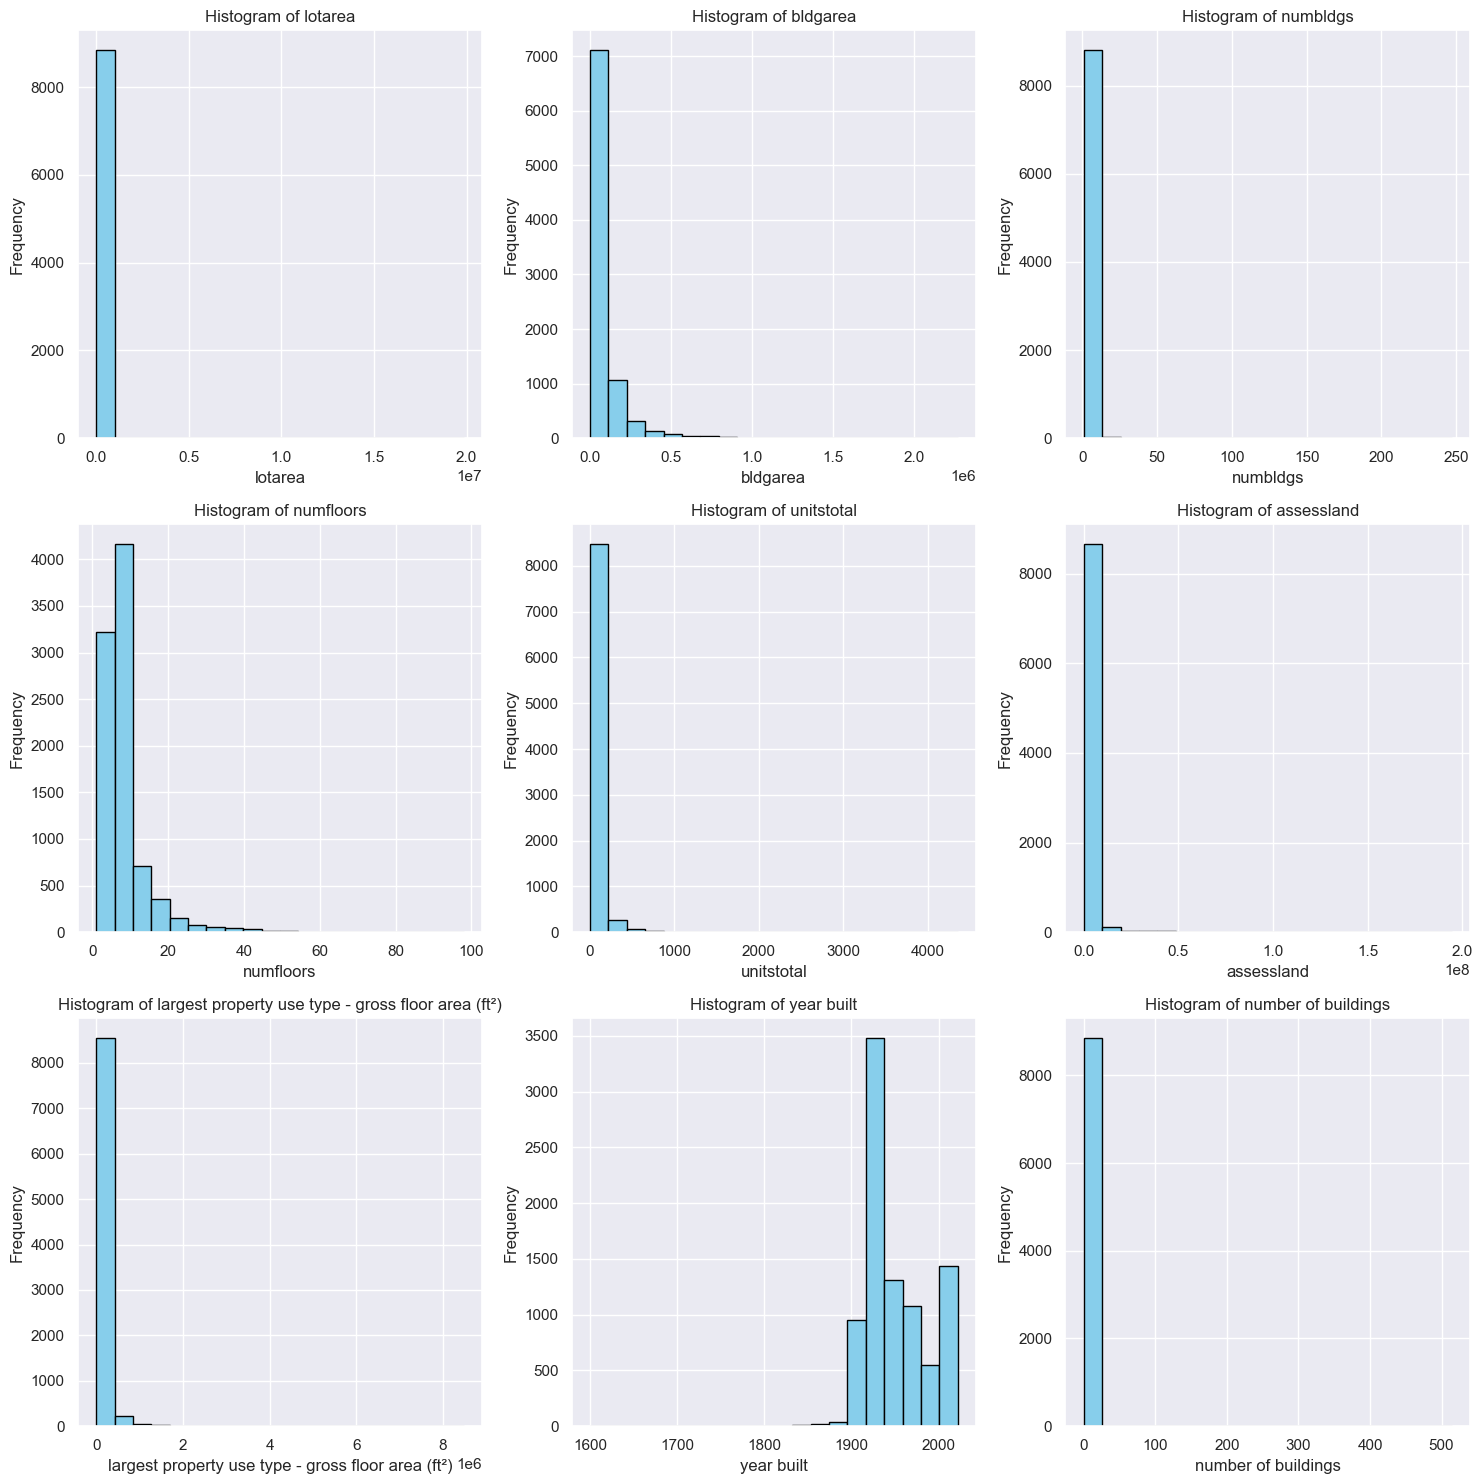

In [151]:

# Number of rows and columns in the grid
n_rows, n_cols = 3, 3

# Create a figure and a set of subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 15))
axes = axes.flatten()  # Flatten the axes array for easy iteration

# Plotting histograms for each numeric column
for i, column in enumerate(df_e.select_dtypes(include=np.number).columns):
    if i >= n_rows * n_cols:  # Check if we've filled up our grid
        break
    axes[i].hist(df_e[column], bins=20, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Histogram of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Hide any unused subplots
for ax in axes[i+1:]:
    ax.remove()

plt.tight_layout()
plt.show()

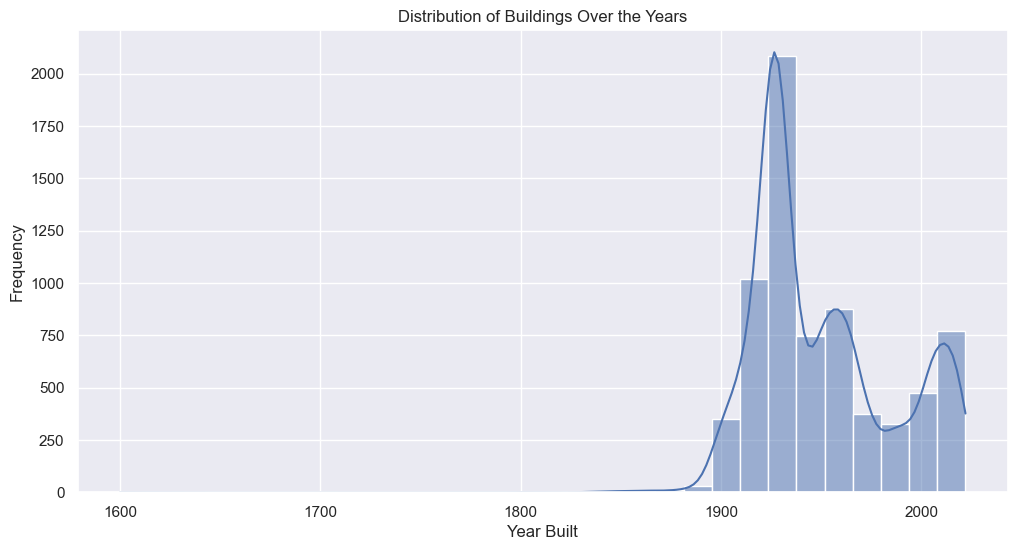

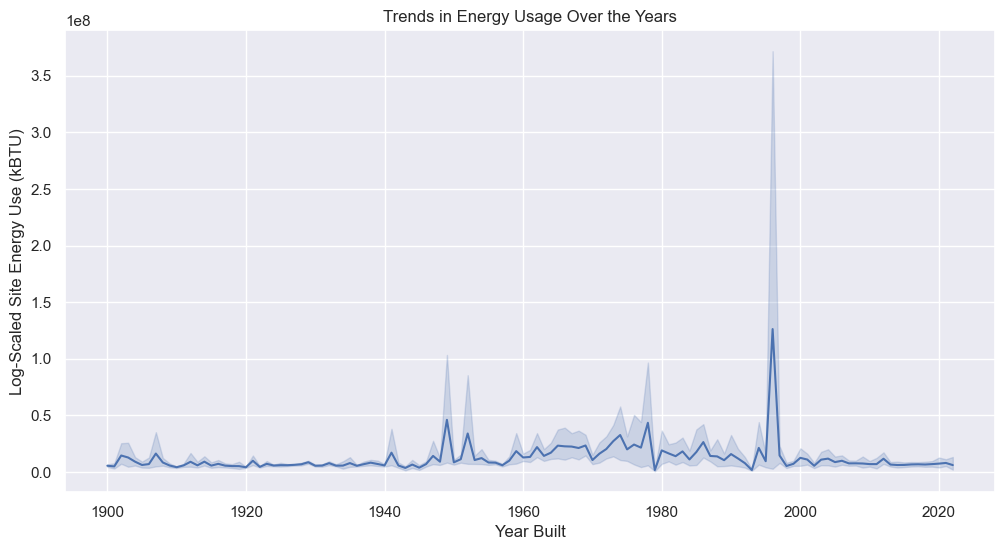

In [192]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of buildings over the years
plt.figure(figsize=(12, 6))
sns.histplot(df_e['year built'], bins=30, kde=True)
plt.title('Distribution of Buildings Over the Years')
plt.xlabel('Year Built')
plt.ylabel('Frequency')
plt.show()

df_e['year built'] = df_e['year built'].apply(lambda x: max(1900, x))

# Trends in energy usage over the years
plt.figure(figsize=(12, 6))
sns.lineplot(x='year built', y='site energy use (kbtu)', data=df_e)
plt.title('Trends in Energy Usage Over the Years')
plt.xlabel('Year Built')
plt.ylabel('Log-Scaled Site Energy Use (kBTU)')
plt.show()

In [153]:
list(df_a_m.columns)

['borough_x',
 'block',
 'lot',
 'cd',
 'bct2020',
 'bctcb2020',
 'ct2010',
 'cb2010',
 'schooldist',
 'council',
 'zipcode',
 'firecomp',
 'policeprct',
 'healthcenterdistrict',
 'healtharea',
 'sanitboro',
 'sanitdistrict',
 'sanitsub',
 'address',
 'zonedist1',
 'zonedist2',
 'zonedist3',
 'zonedist4',
 'overlay1',
 'overlay2',
 'spdist1',
 'spdist2',
 'spdist3',
 'ltdheight',
 'splitzone',
 'bldgclass',
 'landuse',
 'easements',
 'ownertype',
 'ownername',
 'lotarea',
 'bldgarea',
 'comarea',
 'resarea',
 'officearea',
 'retailarea',
 'garagearea',
 'strgearea',
 'factryarea',
 'otherarea',
 'areasource',
 'numbldgs',
 'numfloors',
 'unitsres',
 'unitstotal',
 'lotfront',
 'lotdepth',
 'bldgfront',
 'bldgdepth',
 'ext',
 'proxcode',
 'irrlotcode',
 'lottype',
 'bsmtcode',
 'assessland',
 'assesstot',
 'exempttot',
 'yearbuilt',
 'yearalter1',
 'yearalter2',
 'histdist',
 'landmark',
 'builtfar',
 'residfar',
 'commfar',
 'facilfar',
 'borocode',
 'bbl',
 'condono',
 'tract2010',
 '

In [173]:
# lets drop the nan and the not vailable rows for kbtu/ft2
import numpy as np
df_e= df_e[~df_e[target_energy_efficiency].isin(['not available', np.nan])]
df_e.head()

,borough_x,lotarea,bldgarea,numbldgs,numfloors,unitstotal,assessland,postal code,largest property use type - gross floor area (ft²),year built,construction status,number of buildings,occupancy,property gfa - self-reported (ft²),site energy use (kbtu)
0,bx,316180.0,153816.0,1.0,2.0,3.0,2133000.0,10461,153816.0,1981,existing,1,100,153816.0,7996944.3
18,qn,9000.0,35568.0,1.0,6.0,48.0,364500.0,11106,38532.0,1940,existing,1,100,38532.0,739486.5
19,qn,9313.0,29480.0,1.0,4.0,38.0,183150.0,11102,29480.0,1937,existing,1,95,29480.0,3213156.2
20,qn,30900.0,94250.0,1.0,6.0,125.0,599413.0,11102,99600.0,1963,existing,1,100,99600.0,4647605.3
22,mn,102811.0,324023.0,1.0,19.0,414.0,3074434.0,10025,424552.0,1961,existing,1,100,426042.0,27710965.3


In [174]:
df_e.isnull().sum().sum()

1796

In [175]:
df_e.shape

(8870, 15)

In [176]:
df_e=df_e.dropna()

In [177]:
df_e.shape

(7074, 15)

In [178]:
# Create a list of numerical column names
num = df_e.select_dtypes(include=['float64', 'int64']).columns.tolist()


print("Numerical columns:", num)
#print("Categorical columns:", cat)

Numerical columns: ['lotarea', 'bldgarea', 'numbldgs', 'numfloors', 'unitstotal', 'assessland', 'largest property use type - gross floor area (ft²)', 'year built', 'number of buildings', 'occupancy', 'property gfa - self-reported (ft²)', 'site energy use (kbtu)']


In [179]:
# Create a list of numerical column names
num = df_e.select_dtypes(include=['float64', 'int64']).columns.tolist()

num_exception = ['numbldgs', 'numfloors', 'unitstotal','year built', 'number of buildings', 'occupancy']


# Update num and cat list by removing exceptions
num_up = [column for column in num if column not in num_exception]



In [180]:
# Create copies of df_e for logarithmic and square root transformations
df_e_lt = df_e.copy()

In [181]:
# Apply logarithmic transformation and create new columns
for col in num_up :
    # Ensure no negative or zero values; you might need to add a small constant
    df_e_lt[col + '_log'] = np.log(df_e_lt[col] + 1)

# Drop the original columns that were transformed
df_e_lt.drop(columns=num_up, inplace=True)

In [182]:
df_e_lt

,borough_x,numbldgs,numfloors,unitstotal,postal code,year built,construction status,number of buildings,occupancy,lotarea_log,bldgarea_log,assessland_log,largest property use type - gross floor area (ft²)_log,property gfa - self-reported (ft²)_log,site energy use (kbtu)_log
0,bx,1.0,2.0,3.0,10461,1981,existing,1,100,12.664070,11.943519,14.573040,11.943519,11.943519,15.894570
18,qn,1.0,6.0,48.0,11106,1940,existing,1,100,9.105091,10.479230,12.806285,10.559270,10.559270,13.513713
19,qn,1.0,4.0,38.0,11102,1937,existing,1,95,9.139274,10.291501,12.118066,10.291501,10.291501,14.982765
20,qn,1.0,6.0,125.0,11102,1963,existing,1,100,10.338544,11.453717,13.303708,11.508927,11.508927,15.351863
22,mn,1.0,19.0,414.0,10025,1961,existing,1,100,11.540657,12.688573,14.938632,12.958792,12.962296,17.137339
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9715,qn,1.0,4.0,40.0,11377,1927,existing,1,100,9.314790,10.389026,12.444306,10.389026,10.389026,14.750814
9716,bx,1.0,5.0,56.0,10452,1922,existing,1,100,9.433564,10.959558,10.809748,11.054866,11.054866,15.465542
9717,bk,1.0,6.0,57.0,11226,1928,existing,1,100,9.145909,10.507230,12.901595,10.531910,10.531910,15.128835
9718,mn,1.0,13.0,1.0,10027,1926,existing,1,95,10.236418,12.461184,14.407788,12.461184,12.461184,16.842692


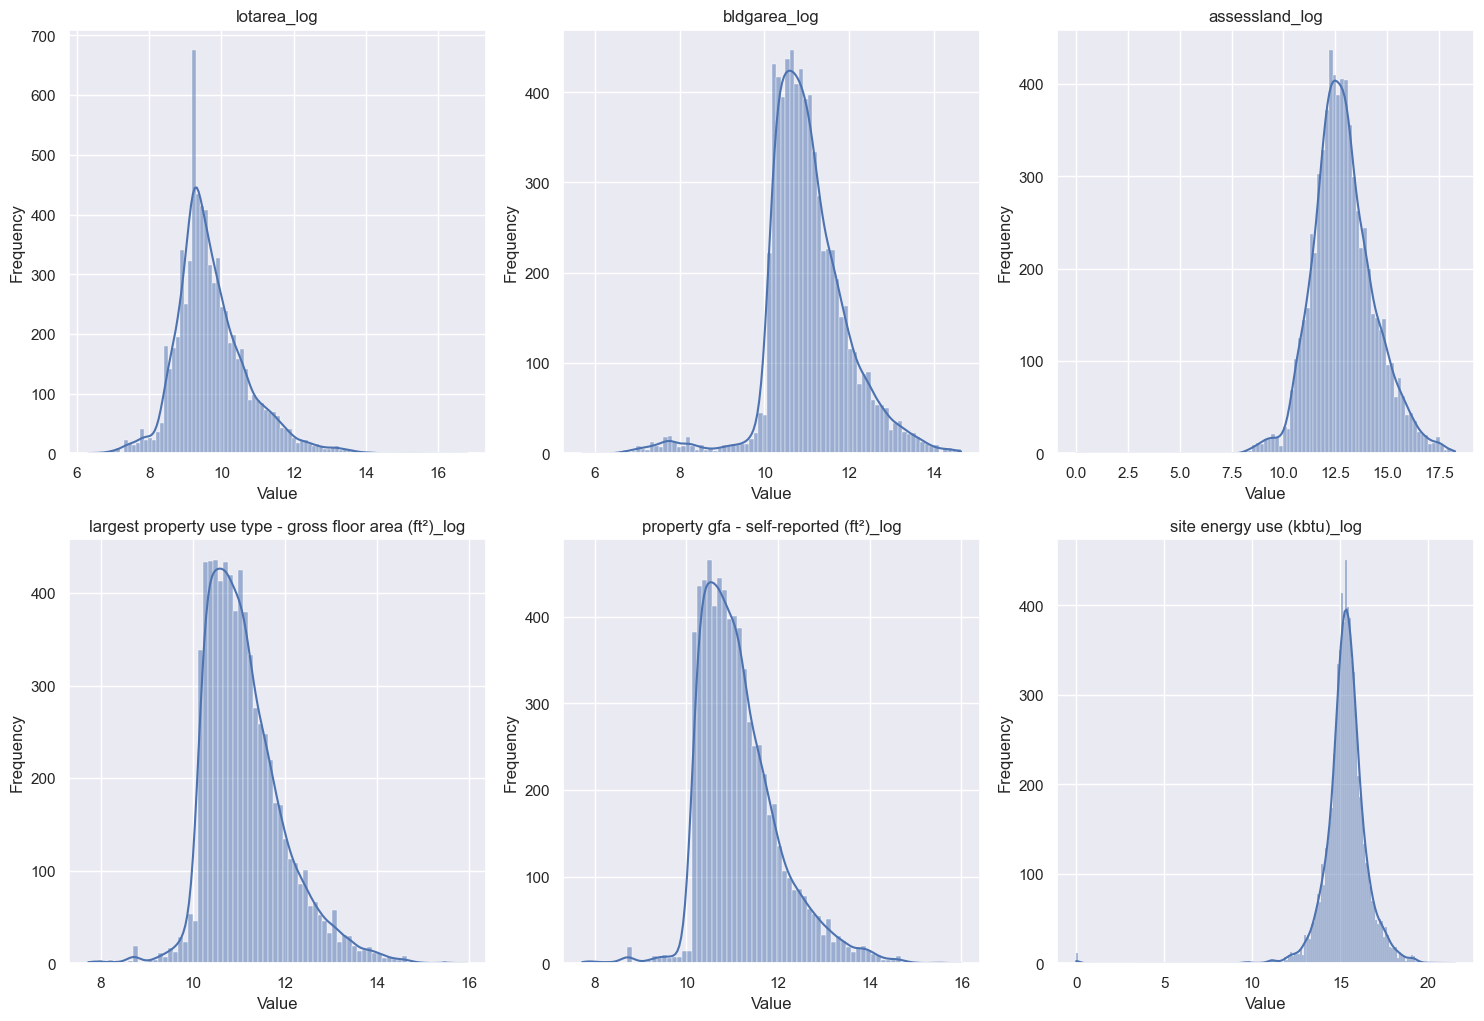

In [183]:
# Function to create 3x3 grid of histograms for columns ending with a specific suffix
def plot_transformed_columns_3x3(df, suffix):
    fig, axes = plt.subplots(3, 3, figsize=(15, 15))
    axes = axes.flatten()  # Flatten the 3x3 matrix of axes

    # Filter columns that end with the specified suffix
    columns_to_plot = [col for col in df.columns if col.endswith(suffix)]

    # Adjust the number of plots based on the number of columns
    num_plots = min(len(columns_to_plot), 9)

    for i in range(num_plots):
        col = columns_to_plot[i]
        sns.histplot(df[col], ax=axes[i], kde=True)
        axes[i].set_title(f'{col}')
        axes[i].set_xlabel('Value')
        axes[i].set_ylabel('Frequency')

    # Hide any empty subplots
    for j in range(num_plots, 9):
        axes[j].set_visible(False)

    plt.tight_layout()
    plt.show()

# Visualize the columns ending with '_log' in df_e_lt
plot_transformed_columns_3x3(df_e_lt, '_log')

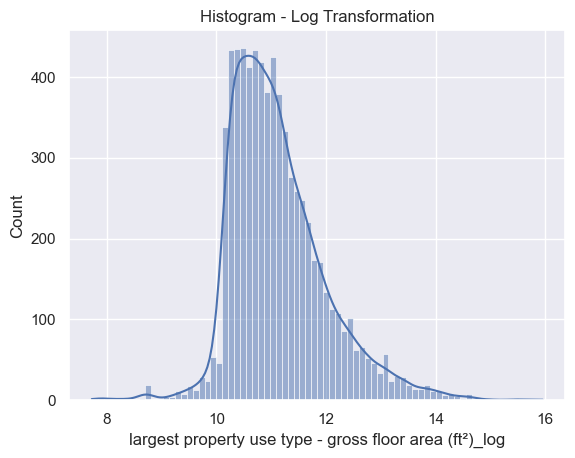

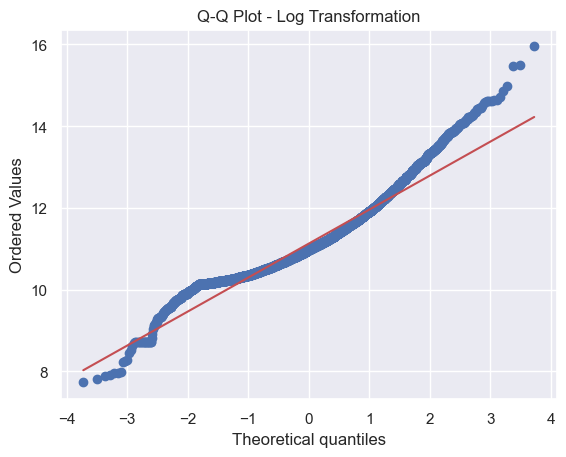

In [184]:
#visualizing the distribution 

import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns


# Function to create a Q-Q plot
def qq_plot(data, title):
    stats.probplot(data, dist="norm", plot=plt)
    plt.title(title)
    plt.show()

# selecting column
column = 'largest property use type - gross floor area (ft²)_log'

# Histogram and Q-Q plot for Log Transformation
sns.histplot(df_e_lt[column], kde=True)
plt.title('Histogram - Log Transformation')
plt.show()

qq_plot(df_e_lt[column], 'Q-Q Plot - Log Transformation')



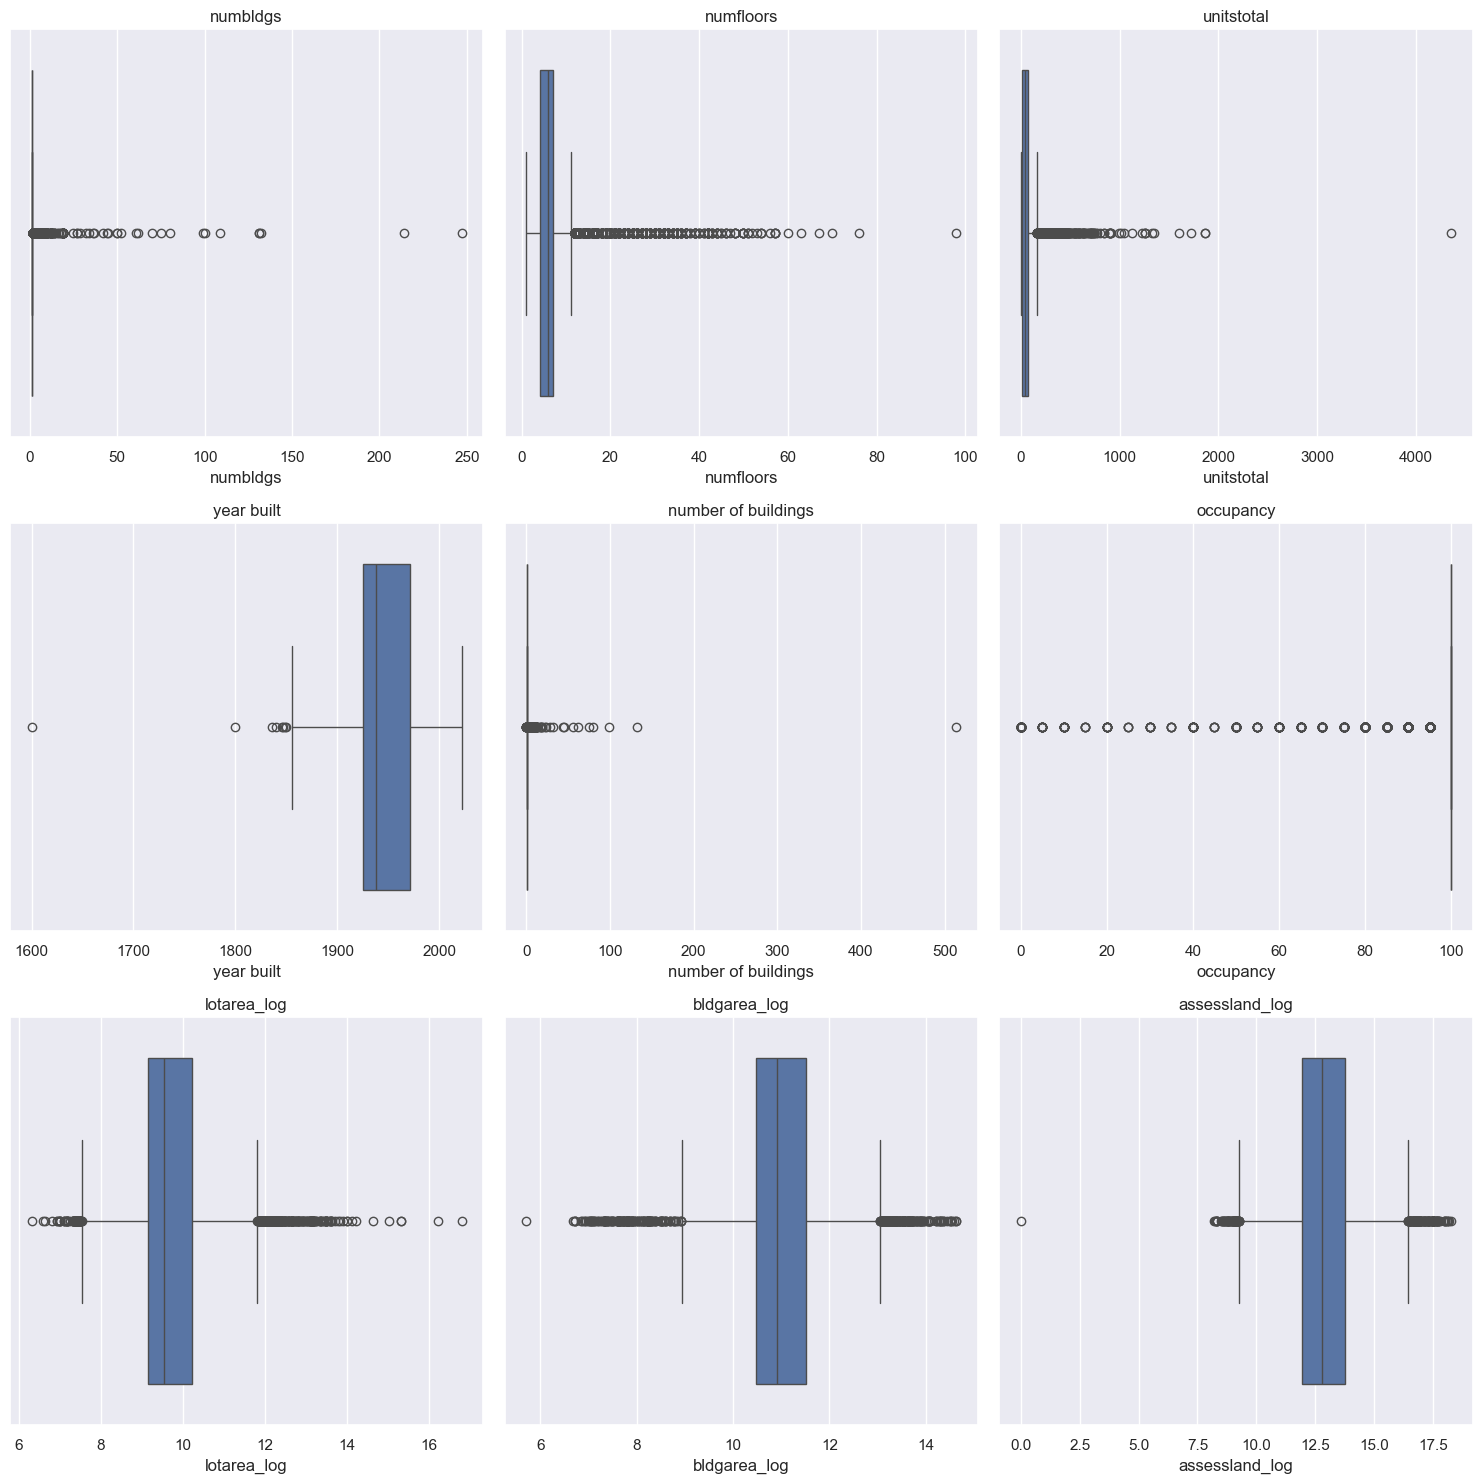

In [186]:

# Set the aesthetic style of the plots
sns.set()

# Select only numerical columns for plotting
numerical_columns = df_e_lt.select_dtypes(include=[np.number]).columns

# Create a 3x3 grid of subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.flatten()  # Flatten the 3x3 matrix of axes

# Plot boxplots in the grid
for i, col in enumerate(numerical_columns):
    if i < 9:  # Ensure we don't go beyond 9 plots
        sns.boxplot(x=df_e_lt[col], ax=axes[i])
        axes[i].set_title(col)
    else:
        break  # Break the loop if there are more than 9 columns

# Hide any unused subplots
for j in range(i, 9):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

In [187]:
#sns.pairplot(df_e_lt)

In [188]:
df_e_lt_numeric = df_e_lt.select_dtypes(include=['float64', 'int64'])


In [189]:
#sns.pairplot(df_e_lt_numeric)

In [190]:
#selecting columns to plot
columns_to_plot = [
    'lotarea_log',
    'bldgarea_log',
    
    'assessland_log',
    'site energy use (kbtu)_log','largest property use type - gross floor area (ft²)_log',
     'property gfa - self-reported (ft²)_log' 
]

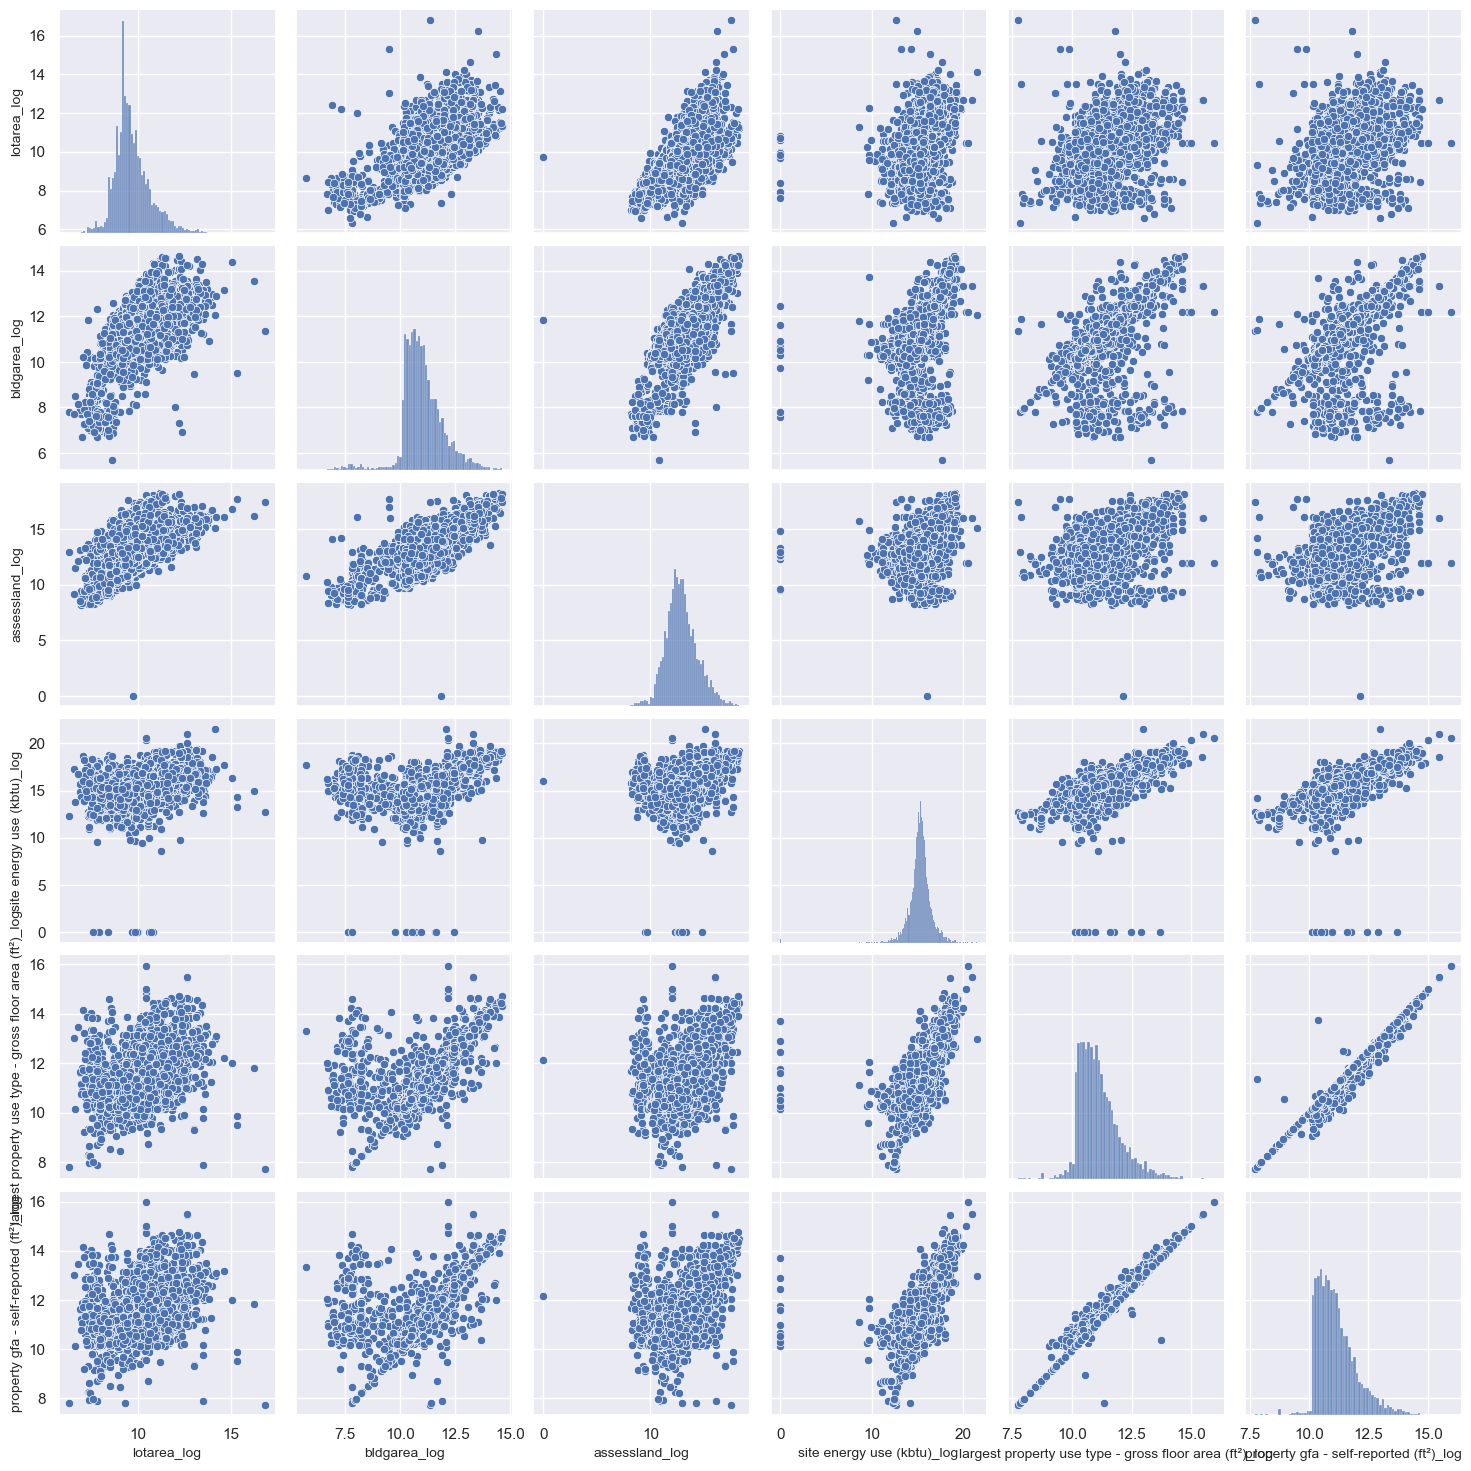

In [191]:
import seaborn as sns


# Create a pairplot and assign it to pair_plot
plot = sns.pairplot(df_e_lt[columns_to_plot])

# Adjust label sizes in the pairplot
for ax in plot.axes.flatten():
    # Adjust x-axis label font size
    ax.set_xlabel(ax.get_xlabel(), fontsize = 10)
    # Adjust y-axis label font size
    ax.set_ylabel(ax.get_ylabel(), fontsize = 10)

plt.show()

In [165]:
df_e_lt_numeric.corr()

,numbldgs,numfloors,unitstotal,year built,number of buildings,occupancy,lotarea_log,bldgarea_log,assessland_log,largest property use type - gross floor area (ft²)_log,property gfa - self-reported (ft²)_log,site energy use (kbtu)_log
numbldgs,1.000000,-0.051147,0.102896,0.017116,0.420910,0.011220,0.227895,0.095882,0.087111,0.070105,0.068314,0.051082
numfloors,-0.051147,1.000000,0.390147,0.178083,-0.020256,-0.051236,0.035582,0.575725,0.526023,0.568025,0.575920,0.408298
unitstotal,0.102896,0.390147,1.000000,0.123234,0.056209,0.046637,0.273160,0.433165,0.248581,0.443672,0.438064,0.324371
year built,0.017116,0.178083,0.123234,1.000000,0.005386,-0.055580,0.208374,0.151241,0.188415,0.143890,0.146257,0.046210
number of buildings,0.420910,-0.020256,0.056209,0.005386,1.000000,0.004427,0.097577,0.040280,0.035386,0.077731,0.076376,0.055004
occupancy,0.011220,-0.051236,0.046637,-0.055580,0.004427,1.000000,0.017812,-0.007449,-0.100445,-0.028245,-0.036095,0.140985
lotarea_log,0.227895,0.035582,0.273160,0.208374,0.097577,0.017812,1.000000,0.634758,0.492020,0.490182,0.487279,0.352025
bldgarea_log,0.095882,0.575725,0.433165,0.151241,0.040280,-0.007449,0.634758,1.000000,0.693603,0.724692,0.723925,0.517731
assessland_log,0.087111,0.526023,0.248581,0.188415,0.035386,-0.100445,0.492020,0.693603,1.000000,0.541236,0.557286,0.371438
largest property use type - gross floor area (ft²)_log,0.070105,0.568025,0.443672,0.143890,0.077731,-0.028245,0.490182,0.724692,0.541236,1.000000,0.988666,0.669629


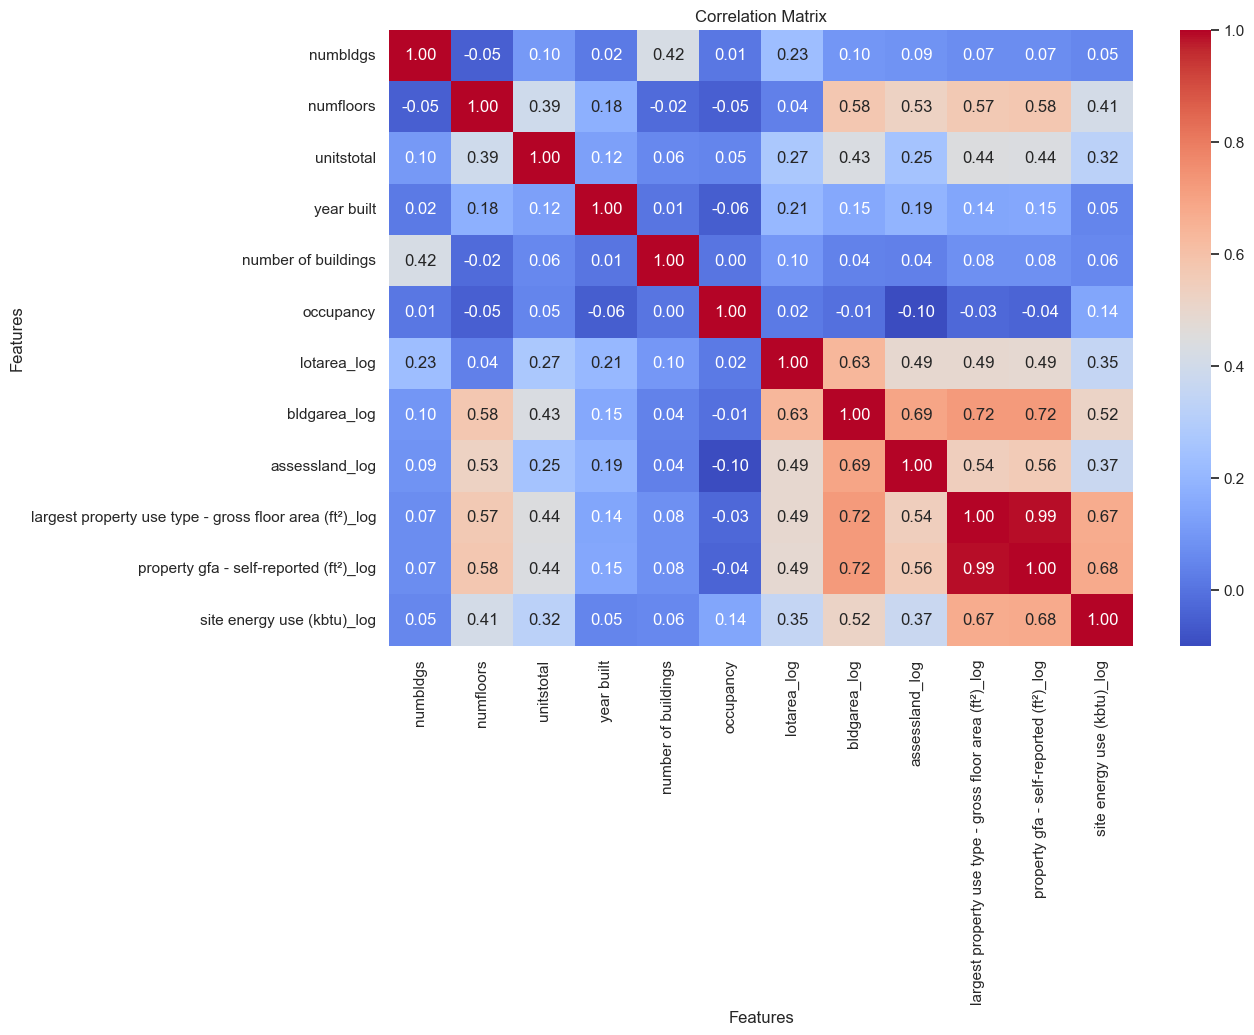

In [166]:
columns_to_plot = [
    'lotarea_log',
    'bldgarea_log','numbldgs','numfloors',
    
    'assessland_log',
    'site energy use (kbtu)_log','largest property use type - gross floor area (ft²)_log',
    'property gfa - self-reported (ft²)_log' 
]
# 'total (location-based) ghg emissions (metric tons co2e)_log',
# Set the size of the figure
plt.figure(figsize=(12, 8))
#corr_matrix = (df_e_lt[columns_to_plot]).corr()
corr_matrix = df_e_lt_numeric.corr()
# Draw the heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)

# Add title and labels
plt.title('Correlation Matrix')
plt.xlabel('Features')
plt.ylabel('Features')

# Show the plot
plt.show()


In [168]:
df_e_lt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6980 entries, 0 to 9509
Data columns (total 15 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   borough_x                                               6980 non-null   object 
 1   numbldgs                                                6980 non-null   float64
 2   numfloors                                               6980 non-null   float64
 3   unitstotal                                              6980 non-null   float64
 4   postal code                                             6980 non-null   object 
 5   year built                                              6980 non-null   int64  
 6   construction status                                     6980 non-null   object 
 7   number of buildings                                     6980 non-null   int64  
 8   occupancy                                  

In [169]:
df_e_lt.isna().sum()

borough_x                                                 0
numbldgs                                                  0
numfloors                                                 0
unitstotal                                                0
postal code                                               0
year built                                                0
construction status                                       0
number of buildings                                       0
occupancy                                                 0
lotarea_log                                               0
bldgarea_log                                              0
assessland_log                                            0
largest property use type - gross floor area (ft²)_log    0
property gfa - self-reported (ft²)_log                    0
site energy use (kbtu)_log                                0
dtype: int64

In [170]:
#pip install geopandas

In [171]:
#pip install fiona shapely descartes

In [224]:
df_e_lt= df_e_lt.dropna()

In [225]:
df_e_lt.shape

(7074, 15)

In [226]:
# Splitting the data
target_energy_efficiency = 'site energy use (kbtu)_log'

#X_e = df_e_c_dropped.select_dtypes(exclude=['object'])
X = df_e_lt.drop('site energy use (kbtu)_log',axis=1)

y = df_e_lt[target_energy_efficiency]

y.shape, X.shape

((7074,), (7074, 14))

In [227]:
#Performing train test split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.25, random_state=42)

In [228]:
print(X_train.columns)


Index(['borough_x', 'numbldgs', 'numfloors', 'unitstotal', 'postal code',
       'year built', 'construction status', 'number of buildings', 'occupancy',
       'lotarea_log', 'bldgarea_log', 'assessland_log',
       'largest property use type - gross floor area (ft²)_log',
       'property gfa - self-reported (ft²)_log'],
      dtype='object')


In [229]:
# Create a list of categorical column names
cat = X_train.select_dtypes(include=['object', 'category']).columns.tolist()
cat

['borough_x', 'postal code', 'construction status']

In [230]:
cat = X_train.select_dtypes(include=['object', 'category']).columns.tolist()
cat_exception = [''] #postal code
cat_up = [col for col in cat if col not in cat_exception]
cat_up 

['borough_x', 'postal code', 'construction status']

In [231]:
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder

# Instantiate transformers

ohe = OneHotEncoder(drop='first', sparse=False,handle_unknown='ignore')


In [232]:
# Transform the categorical columns
X_train_encoded = ohe.fit_transform(X_train[cat_up])
X_test_encoded = ohe.transform(X_test[cat_up])

# Convert the transformed array back into a DataFrame
X_train_encoded_df = pd.DataFrame(X_train_encoded, 
                                  columns=ohe.get_feature_names_out(cat_up), 
                                  index=X_train.index)

# Drop the original categorical columns from X_train
X_train.drop(columns=cat_up, inplace=True)

# Concatenate the remaining columns of X_train with the new one-hot encoded columns
X_train = pd.concat([X_train, X_train_encoded_df], axis=1)


/Users/DonJuve/anaconda3/envs/capstone/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/DonJuve/anaconda3/envs/capstone/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [233]:
# Transform the categorical columns in X_test using the already fitted ohe
X_test_encoded = ohe.transform(X_test[cat_up])

# Convert the transformed array back into a DataFrame
X_test_encoded_df = pd.DataFrame(X_test_encoded, 
                                 columns=ohe.get_feature_names_out(cat_up), 
                                 index=X_test.index)

# Drop the original categorical columns from X_test
X_test.drop(columns=cat_up, inplace=True)

# Concatenate the remaining columns of X_test with the new one-hot encoded columns
X_test = pd.concat([X_test, X_test_encoded_df], axis=1)


/Users/DonJuve/anaconda3/envs/capstone/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [234]:
X_train.shape, y_train.shape

((5305, 210), (5305,))

In [235]:
X_test.shape

(1769, 210)

In [236]:
df_e_lt.isna().sum()

borough_x                                                 0
numbldgs                                                  0
numfloors                                                 0
unitstotal                                                0
postal code                                               0
year built                                                0
construction status                                       0
number of buildings                                       0
occupancy                                                 0
lotarea_log                                               0
bldgarea_log                                              0
assessland_log                                            0
largest property use type - gross floor area (ft²)_log    0
property gfa - self-reported (ft²)_log                    0
site energy use (kbtu)_log                                0
dtype: int64

In [237]:
df_e_lt.shape

(7074, 15)

In [238]:
from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
#X_train_e_sc = scaler.fit_transform(X_train_e)
#X_test_e_sc = scaler.transform(X_test_e)


In [239]:
X_train.shape, 

((5305, 210),)

## Model with Linear Regression 

In [240]:
# Initialize and train the Linear Regression model
lr_model = LinearRegression(n_jobs=50)
#model_energy.fit(X_train_e_sc, y_train_e)
lr_model.fit(X_train, y_train)

# Make predictions and evaluate the model 
y_pred_lr = lr_model.predict(X_train)
mse_e_lr = mean_squared_error(y_train, y_pred_lr)

#crossvalidation score
mse_scores_lr = -(cross_val_score(lr_model, X_train, y_train, cv=3, scoring='neg_mean_squared_error'))
mse_scores_lr_mean =mse_scores_lr.mean()
rsquared_lr = lr_model.score(X_train, y_train)
accuracy_lr = cross_val_score(lr_model, X_train,y_train).mean()

print("=== Linear Regression MODEL SUMMARY==")
print("Mean Squared Error for Energy Efficiency model:", mse_e_lr)
print("R-Squared", rsquared_lr) #explain variation in the target
print("Mean MSE:-cross val ", mse_scores_lr_mean)
print("Model accuracy",accuracy_lr)

=== Linear Regression MODEL SUMMARY==
Mean Squared Error for Energy Efficiency model: 0.7831568596326388
R-Squared 0.5020977018428523
Mean MSE:-cross val  0.8860471204259119
Model accuracy 0.45728822751322423


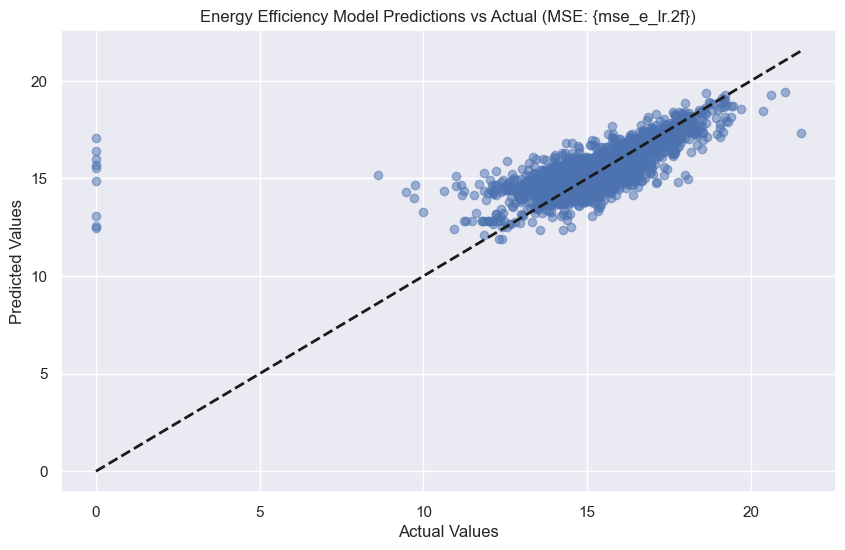

In [246]:
# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_pred_lr, alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)  # Diagonal line for reference
plt.title('Energy Efficiency Model Predictions vs Actual (MSE: {mse_e_lr.2f})')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()


In [247]:
# Get feature names
feature_names = X_train.columns

# Get coefficients
coefficients = lr_model.coef_

# Lets create a DataFrame from the features
feature_importance = pd.DataFrame(coefficients, index=feature_names, columns=['Coefficient'])

# Sort the features by their absolute coefficients
feature_importance['Absolute Coefficient'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values(by='Absolute Coefficient', ascending=False)

# Display the feature importances
feature_importance

,Coefficient,Absolute Coefficient
postal code_10020,-2.216194,2.216194
postal code_11426,-1.803344,1.803344
postal code_11370,1.170136,1.170136
construction status_existing,-1.156638,1.156638
postal code_11413,-1.108260,1.108260
...,...,...
postal code_10271,-0.006193,0.006193
numbldgs,-0.002892,0.002892
year built,-0.001988,0.001988
number of buildings,0.000333,0.000333


## Model with Random Forest Regressor

In [248]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(max_depth=6, min_samples_leaf=4, min_samples_split=4) # max_depth=4, min_samples_leaf=5, min_samples_split=4
#Fitting the model 
rf_model.fit(X_train, y_train)

#calculate y_pred_rf on train

y_pred_train_rf = rf_model.predict(X_train)
mse_e_rf = mean_squared_error(y_train, y_pred_train_rf)
#Cross validation 
mse_scores_rf = -(cross_val_score(rf_model, X_train, y_train, cv=3, scoring='neg_mean_squared_error'))


mse_scores_rf = -(cross_val_score(rf_model, X_train, y_train, cv=3, scoring='neg_mean_squared_error'))
mse_scores_rf_mean =mse_scores_rf.mean()
rsquared_rf = r2_score(y_train, y_pred_train_rf)
accuracy_rf = cross_val_score(rf_model, X_train,y_train).mean()

print("===Random Forest Regressor MODEL SUMMARY==")
print("Mean Squared Error for RF model:", mse_e_rf)
print("R-Squared", rsquared_lr) #explain variation in the target
print("Mean MSE:-cross val ", mse_scores_rf_mean)
print("Model accuracy",accuracy_rf)

===Random Forest Regressor MODEL SUMMARY==
Mean Squared Error for RF model: 0.6498821605244508
R-Squared 0.5020977018428523
Mean MSE:-cross val  0.844783201405715
Model accuracy 0.4802084688983017


In [249]:
##### Using Grid search to look for the best parameters

param_grid = {
    'max_depth': [4, 5,6],
    'min_samples_leaf': [3,4,5],
    'min_samples_split':[2,4,6],
}

rf_model = DecisionTreeRegressor()

grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

#Best parameters
print("Best parameters found: ", grid_search.best_params_)

#Best cross-validated score
print("Best cross-validated accuracy: {:.2f}".format(grid_search.best_score_))

Best parameters found:  {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best cross-validated accuracy: -0.85


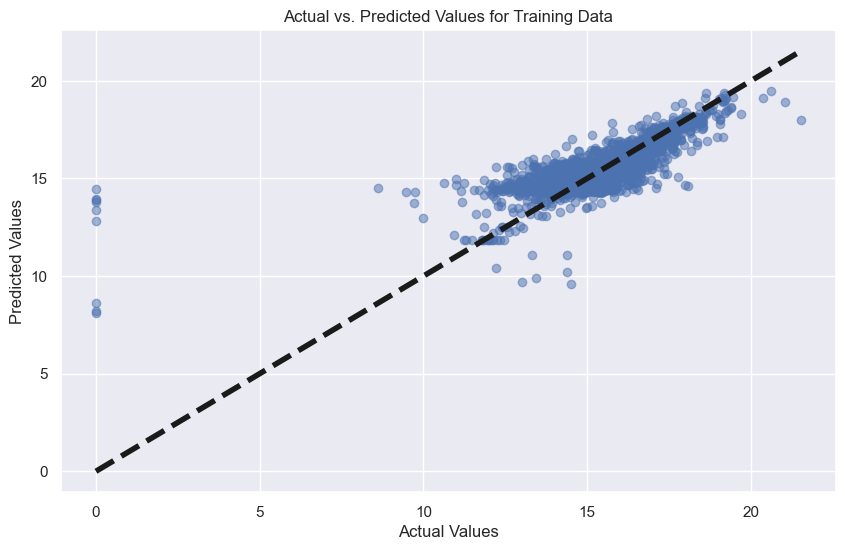

In [250]:
import matplotlib.pyplot as plt

# Actual vs. Predicted scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_pred_train_rf, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values for Training Data')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)  # Diagonal line
plt.show()

## Model with Decision Tree Regressor

In [251]:
#instantiation 
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor(max_depth=8, min_samples_leaf=1, min_samples_split=4,max_features=50,random_state=42)
#fitting the model 
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8, max_features=50, min_samples_split=4,
                      random_state=42)

In [252]:

#calculate y_pred_rf on train

y_pred_train_dt = dt_model.predict(X_train)

#Cross validation 
mse_scores = -(cross_val_score(dt_model, X_train, y_train, cv=3, scoring='neg_mean_squared_error'))


mse_e_dt = mean_squared_error(y_train, y_pred_train_dt)
#Cross validation 
mse_scores_dt = -(cross_val_score(rf_model, X_train, y_train, cv=3, scoring='neg_mean_squared_error'))


mse_scores_dt = -(cross_val_score(dt_model, X_train, y_train, cv=3, scoring='neg_mean_squared_error'))
mse_scores_dt_mean =mse_scores_dt.mean()
rsquared_dt = r2_score(y_train, y_pred_train_dt)
accuracy_dt = cross_val_score(dt_model, X_train,y_train).mean()

# Calculate and print metrics on training set
print("===Decision Tree Regressor MODEL SUMMARY==")
print("Mean Squared Error Training:",mse_scores_dt_mean)
print("R-squared  Training:", rsquared_dt)
print("Mean Squared average:/ Crossval", mse_scores_dt_mean)
print("Model accuracy",accuracy_dt)


===Decision Tree Regressor MODEL SUMMARY==
Mean Squared Error Training: 1.0859437531958005
R-squared  Training: 0.5896034764593485
Mean Squared average:/ Crossval 1.0859437531958005
Model accuracy 0.4032126583608271


In [253]:
# Get feature names
feature_names = X_train.columns

# Get feature importances from the decision tree model
importances = dt_model.feature_importances_

# Create a DataFrame from the features and importances
feature_importance = pd.DataFrame(importances, index=feature_names, columns=['Importance'])

# Sort the features by their importances
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Display the feature importances
feature_importance

,Importance
largest property use type - gross floor area (ft²)_log,0.481960
property gfa - self-reported (ft²)_log,0.278127
postal code_10023,0.051784
bldgarea_log,0.041480
unitstotal,0.037522
...,...
postal code_10451,0.000000
postal code_10452,0.000000
postal code_10453,0.000000
postal code_10456,0.000000


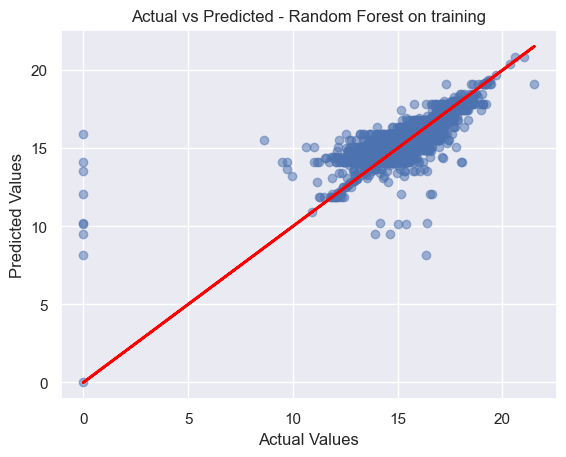

In [254]:
#Visualizing Predictions
import matplotlib.pyplot as plt
y_pred_train_dt = dt_model.predict(X_train)

plt.scatter(y_train, y_pred_train_dt, alpha=0.5)

# Line for perfect predictions
plt.plot(y_train, y_train, color='red', linewidth=2) 

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted - Random Forest on training")

plt.show()

In [255]:
#Using Grid search to look for the best parameters

param_grid = {
    'max_depth': [2, 4, 8],
    'min_samples_leaf': [1,2,3],
    'min_samples_split':[4,6,8],
}

dt_model = DecisionTreeRegressor()

grid_search = GridSearchCV(dt_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

#Best parameters
print("Best parameters found: ", grid_search.best_params_)

#Best cross-validated score
print("Best cross-validated accuracy: {:.2f}".format(grid_search.best_score_))


Best parameters found:  {'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 8}
Best cross-validated accuracy: -0.90


## Model with Gradient Descent XGboost


In [256]:
#pip install xgboost

In [257]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5305 entries, 7988 to 1250
Columns: 210 entries, numbldgs to construction status_test
dtypes: float64(207), int64(3)
memory usage: 8.5 MB


In [258]:
#X_train=X_train.drop('postal code')
X_train = X_train.reset_index(drop=True)
X_train

,numbldgs,numfloors,unitstotal,year built,number of buildings,occupancy,lotarea_log,bldgarea_log,assessland_log,largest property use type - gross floor area (ft²)_log,...,postal code_11434,postal code_11435,postal code_11436,postal code_11691,postal code_11692,postal code_11693,postal code_11694,postal code_12226,construction status_existing,construction status_test
0,1.0,6.0,38.0,1950,1,100,8.922792,10.049318,12.660372,10.433616,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,6.0,81.0,1950,1,100,9.998843,11.264861,12.755641,11.332530,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,6.0,57.0,1941,1,100,9.257319,10.780101,10.992066,10.780310,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,13.0,48.0,1926,1,100,9.019059,11.160854,13.977882,11.423351,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,11.0,129.0,1986,1,100,10.236454,11.694655,15.466960,11.838994,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5300,1.0,4.0,43.0,1924,1,100,9.586583,10.616217,11.079076,10.640915,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5301,1.0,6.0,40.0,1937,1,100,8.839422,10.525702,10.357775,10.537309,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5302,1.0,5.0,31.0,1916,1,100,8.832004,10.334653,11.589896,10.334653,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5303,1.0,8.0,32.0,1958,1,100,10.274258,10.613811,12.317842,10.681458,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [259]:
import xgboost as xgb

# Create the XGBoost instance
xgb_model = xgb.XGBRegressor(n_estimators=10, learning_rate=0.1, max_depth=10) #n_estimators=10, learning_rate=0.1, max_depth=10
#'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 6




# Fit the model
xgb_model.fit(X_train, y_train)



XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=10, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [262]:

#calculate y_pred_xgb on train

y_pred_train_xgb = xgb_model.predict(X_train)

#Cross validation 
mse_scores_xgb = -(cross_val_score(xgb_model, X_train, y_train, cv=3, scoring='neg_mean_squared_error'))
mse_scores_xgb_mean =mse_scores_xgb.mean()

mse_e_xgb = mean_squared_error(y_train, y_pred_train_xgb)



mse_scores_xgb = -(cross_val_score(xgb_model, X_train, y_train, cv=3, scoring='neg_mean_squared_error'))
rsquared_xgb = r2_score(y_train, y_pred_train_xgb)
accuracy_xgb = cross_val_score(xgb_model, X_train,y_train).mean()

# Calculate and print metrics on training set
print("=== Gradient Descent XGBoost MODEL SUMMARY==")
print("Mean Squared Error Training:",mse_scores_xgb_mean)
print("R-squared  Training:", rsquared_xgb)
print("Mean Squared average:/ Crossval", mse_scores_xgb_mean)
print("Model accuracy",accuracy_dt)


=== Gradient Descent XGBoost MODEL SUMMARY==
Mean Squared Error Training: 0.9483908701816625
R-squared  Training: 0.6709262874314805
Mean Squared average:/ Crossval 0.9483908701816625
Model accuracy 0.4032126583608271


In [263]:
##PLOT BEST TREE (pp) AAND EXPLIN IN

In [264]:
#Using Grid search to look for the best parameters

param_grid = {
    'max_depth': [2, 4, 8],
    'min_samples_leaf': [1,2,3],
    'min_samples_split':[4,6,8],
}

xgb_model = DecisionTreeRegressor()

grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

#Best parameters
print("Best parameters found: ", grid_search.best_params_)

#Best cross-validated score
print("Best cross-validated accuracy: {:.2f}".format(grid_search.best_score_))

Best parameters found:  {'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 8}
Best cross-validated accuracy: -0.90


## Baseline Models Summary 
'So far the linear Regression is our best model with the higest cross validation score'


''''
=== Linear Regression MODEL SUMMARY==
Mean Squared Error for Energy Efficiency model: 0.03378337559569033
R-Squared 0.968041818682259
Mean MSE:-cross val  2745772250922531.5
Model accuracy 0.9674890593752579

===Random Forest Regressor MODEL SUMMARY==
Mean Squared Error Training: 0.034340207025185754
R-squared  Training: 0.967515070852196
Mean Squared average:/ Crossval 0.05115722663194122
Mean MSE:-cross val  0.05115722663194122

===Decision Tree Regressor MODEL SUMMARY==
Mean Squared Error Training: 0.014024258826550916
R-squared  Training: 0.9867334214381165
Mean Squared average:/ Crossval 0.2052413055027733
Model accuracy 0.9192932718266695

=== Gradient Descent XGBoost MODEL SUMMARY==
Mean Squared Error Training: 0.16014945615962706
R-squared  Training: 0.8485028429622088
Mean Squared average:/ Crossval 0.19434603451401064
Model accuracy 0.8282779029186195
'''

In [265]:
## Best Model Evaluation on the test set

#calculate y_pred_rf  on test set
y_pred_lr = lr_model.predict(X_test)

# Calculate and print metrics on test
print("Mean Squared Error Test:", mean_squared_error(y_test, y_pred_lr))
print("R-squared Test::", r2_score(y_test, y_pred_lr))
print("model score:",lr_model.score(X_test,y_test))


Mean Squared Error Test: 0.6748994893461412
R-squared Test:: 0.5361161857578061
model score: 0.5361161857578061


In [266]:
##  Model 1 Summary 
print("=== Linear Regression MODEL SUMMARY==")
print("Mean Squared Error for Energy Efficiency model:", mse_e_lr)
print("R-Squared", rsquared_lr) #explain variation in the target
print("Mean MSE:-cross val ", mse_scores_lr_mean)
print("Model accuracy",accuracy_lr)
print("===Random Forest Regressor MODEL SUMMARY==")
print("Mean Squared Error for RF model:", mse_e_rf)
print("R-Squared", rsquared_lr) #explain variation in the target
print("Mean MSE:-cross val ", mse_scores_rf_mean)
print("Model accuracy",accuracy_rf)
print("===Decision Tree Regressor MODEL SUMMARY==")
print("Mean Squared Error Training:",mse_scores_dt_mean)
print("R-squared  Training:", rsquared_dt)
print("Mean Squared average:/ Crossval", mse_scores_dt_mean)
print("Model accuracy",accuracy_dt)
print("=== Gradient Descent XGBoost MODEL SUMMARY==")
print("Mean Squared Error Training:",mse_scores_xgb_mean)
print("R-squared  Training:", rsquared_xgb)
print("Mean Squared average:/ Crossval", mse_scores_xgb_mean)
print("Model accuracy",accuracy_dt)


=== Linear Regression MODEL SUMMARY==
Mean Squared Error for Energy Efficiency model: 0.7831568596326388
R-Squared 0.5020977018428523
Mean MSE:-cross val  0.8860471204259119
Model accuracy 0.45728822751322423
===Random Forest Regressor MODEL SUMMARY==
Mean Squared Error for RF model: 0.6498821605244508
R-Squared 0.5020977018428523
Mean MSE:-cross val  0.844783201405715
Model accuracy 0.4802084688983017
===Decision Tree Regressor MODEL SUMMARY==
Mean Squared Error Training: 1.0859437531958005
R-squared  Training: 0.5896034764593485
Mean Squared average:/ Crossval 1.0859437531958005
Model accuracy 0.4032126583608271
=== Gradient Descent XGBoost MODEL SUMMARY==
Mean Squared Error Training: 0.9483908701816625
R-squared  Training: 0.6709262874314805
Mean Squared average:/ Crossval 0.9483908701816625
Model accuracy 0.4032126583608271
